In [178]:
import warnings
warnings.filterwarnings('ignore')

In [179]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from matplotlib import colors


In [180]:
pal = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pal)

# read data

https://archive.ics.uci.edu/dataset/109/wine

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. 

The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
- Proline

In [181]:
data = pd.read_csv("./data/wine-clustering.csv", sep=',')
data.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [182]:
data.shape

(178, 13)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [184]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [185]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [186]:

print(f"Pre uklanjanja duplikata: {data.count()}")
data.drop_duplicates(subset=None,inplace=True)
print(f"Nakon uklanjanja duplikata: {data.count()}")


Pre uklanjanja duplikata: Alcohol                 178
Malic_Acid              178
Ash                     178
Ash_Alcanity            178
Magnesium               178
Total_Phenols           178
Flavanoids              178
Nonflavanoid_Phenols    178
Proanthocyanins         178
Color_Intensity         178
Hue                     178
OD280                   178
Proline                 178
dtype: int64
Nakon uklanjanja duplikata: Alcohol                 178
Malic_Acid              178
Ash                     178
Ash_Alcanity            178
Magnesium               178
Total_Phenols           178
Flavanoids              178
Nonflavanoid_Phenols    178
Proanthocyanins         178
Color_Intensity         178
Hue                     178
OD280                   178
Proline                 178
dtype: int64


In [187]:
num_rows = (len(data.columns) - 1) // 2 + 1
num_columns = min(4, len(data.columns))

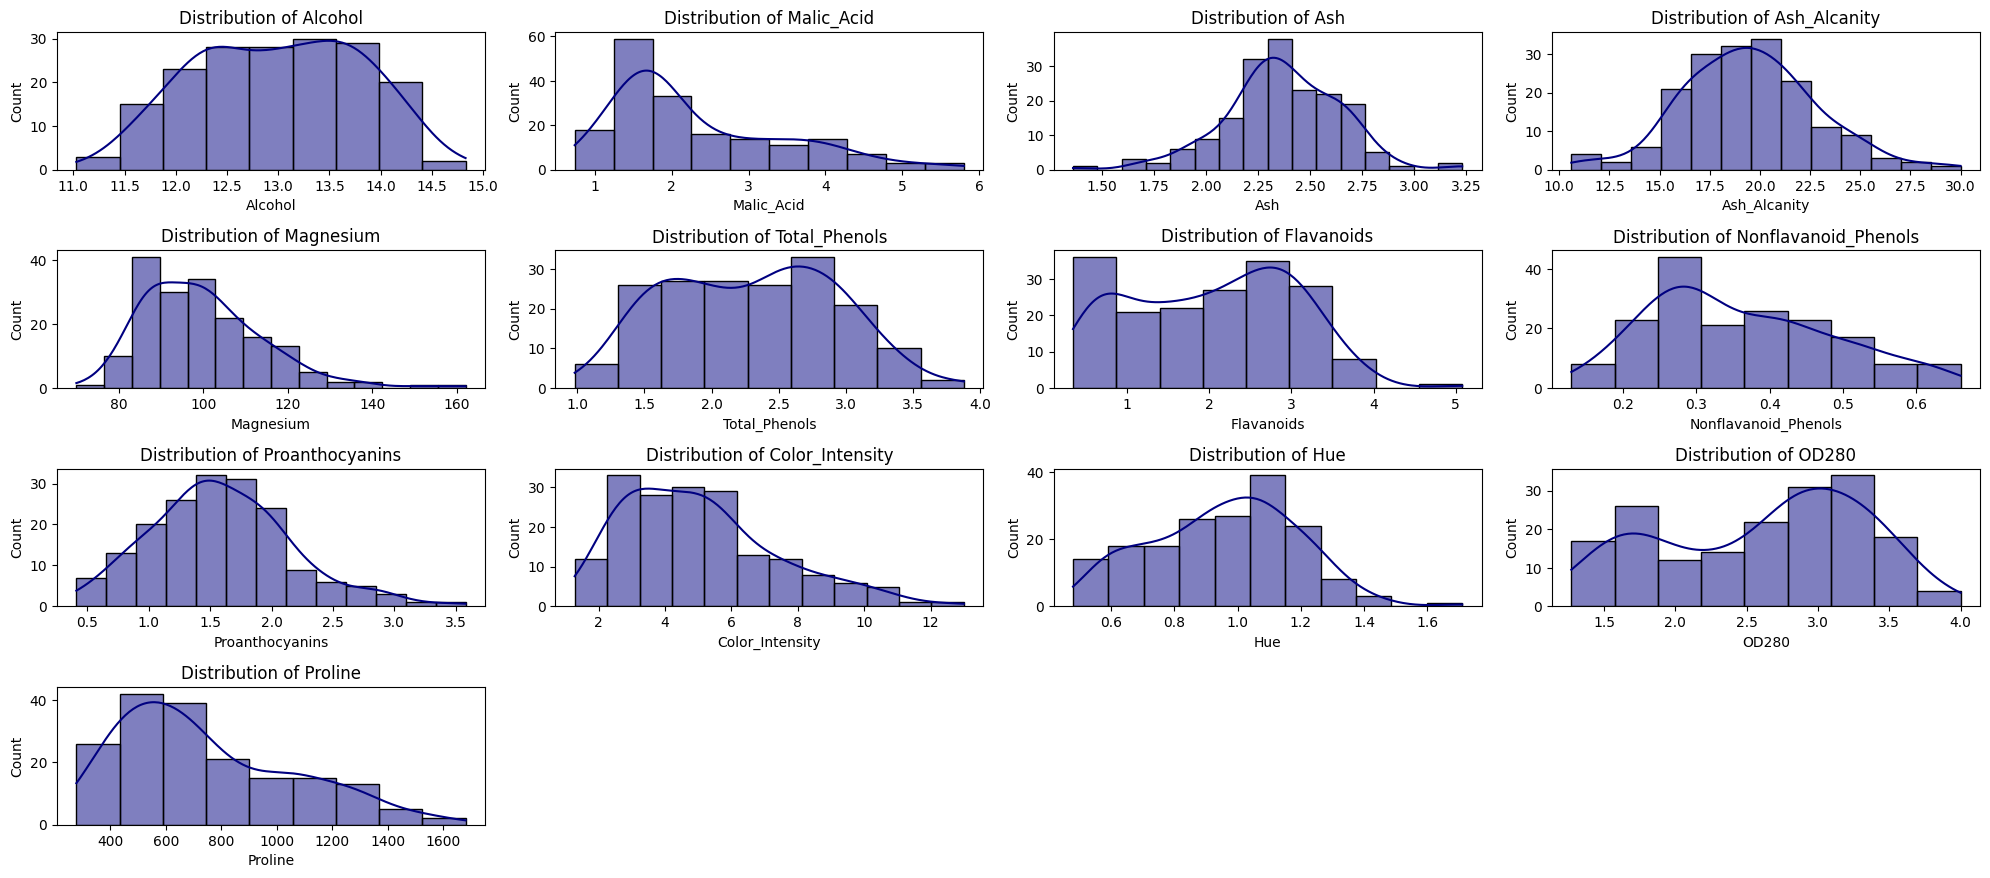

In [188]:

plt.figure(figsize=(20, 15))

for i, attribute in enumerate(data.columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(data[attribute], kde=True,  color='navy')
    plt.title(f'Distribution of {attribute}')

plt.tight_layout()
plt.show()

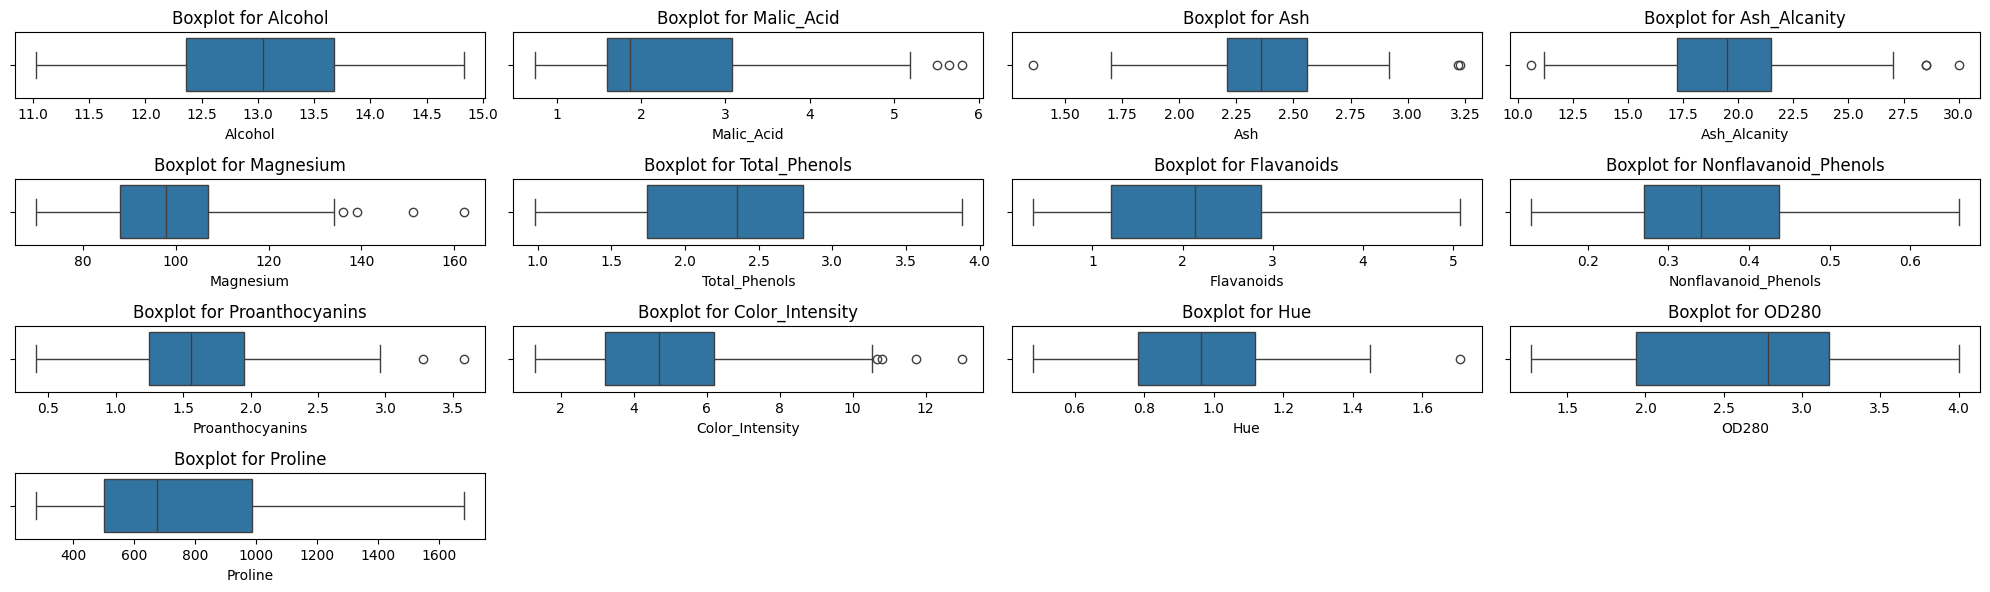

In [189]:


plt.figure(figsize=(20, 10))

for i, attribute in enumerate(data.columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=data[attribute])
    plt.title(f'Boxplot for {attribute}')

plt.tight_layout()
plt.show()


nema vecih odstupanja tako da necu uklanjati vrednsti


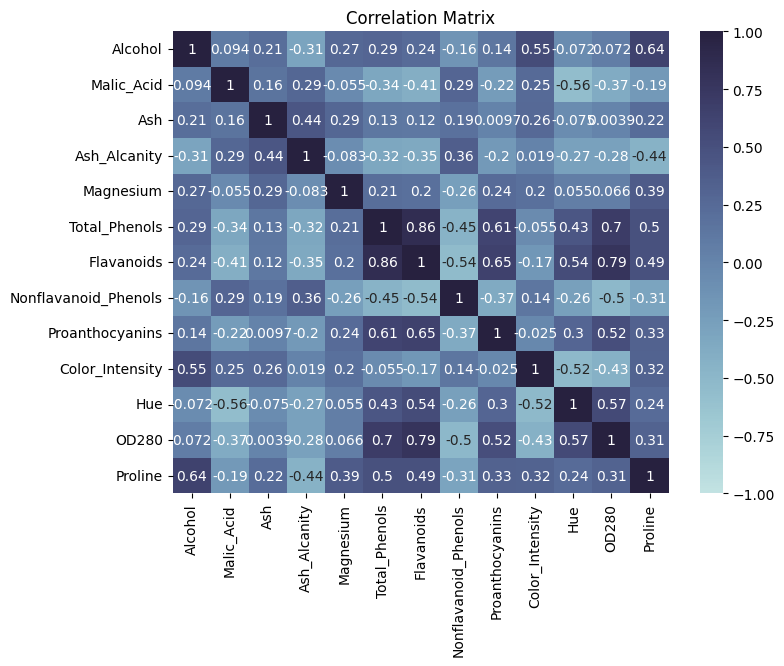

In [190]:
corr_matrix = data.corr()

plt.figure(figsize=(8,6))
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

velika zavisnost izmedju Flavanoids i Total_Phenols, mozemo izbaciti jednu kolonu

In [191]:
data=data.drop(columns='Flavanoids')

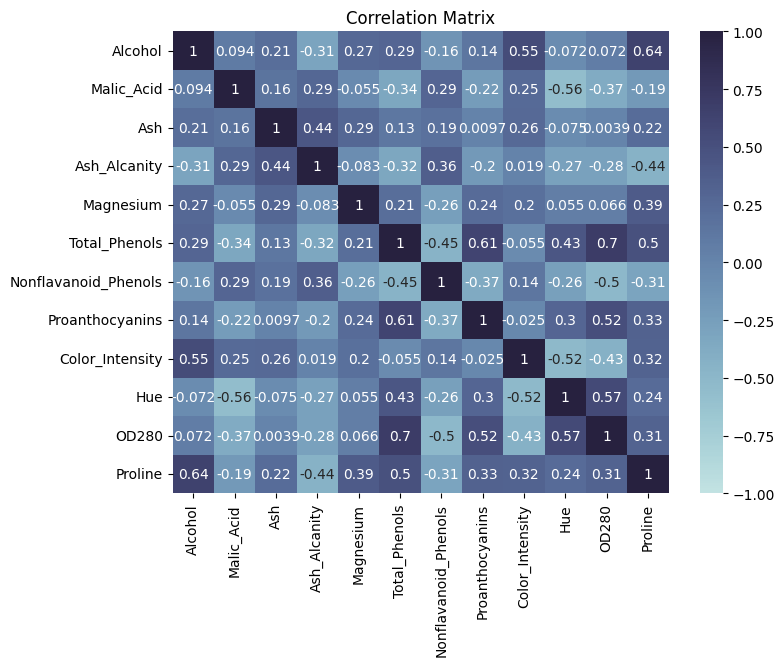

In [192]:

corr_matrix = data.corr()

plt.figure(figsize=(8,6))
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [193]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# scale data

In [194]:

scaler = StandardScaler()
scaler.fit(data)
scaled_df = pd.DataFrame(scaler.transform(data), columns = data.columns)
scaled_df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# PCA

In [195]:
pca = PCA(n_components = 3)
pca.fit(scaled_df)

pca_df = pd.DataFrame(pca.transform(scaled_df), columns = ['c1', 'c2', 'c3'])
pca_df.head().T

,0,1,2,3,4
c1,3.195942,2.164482,2.163996,3.451585,0.743463
c2,1.433655,-0.341295,1.027405,2.747487,0.870430
c3,0.037766,-1.937300,1.006095,-0.083941,2.059030


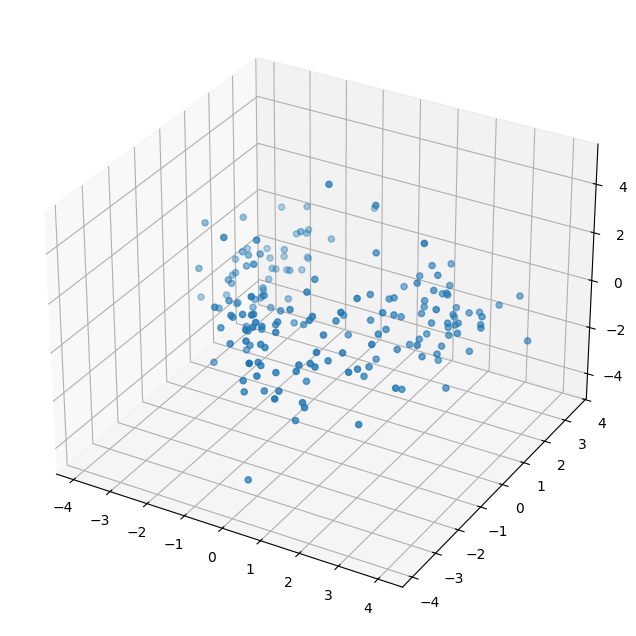

In [196]:
x = pca_df['c1']
y = pca_df['c2']
z = pca_df['c3']

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z,  marker = 'o')
plt.show()

# Elbow

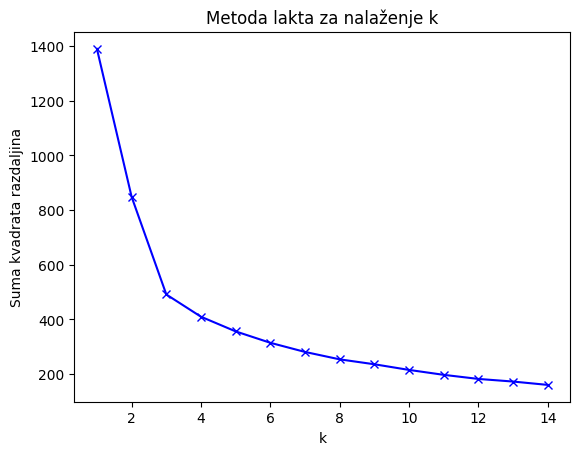

In [197]:

Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(pca_df)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-') 
plt.xlabel('k')
plt.ylabel('Suma kvadrata razdaljina')
plt.title('Metoda lakta za nalaženje k')
plt.show()


zakrivljenje se moze uociti kod broja 3 zato se bira 3 za broj klastera 

# KMeans

In [198]:
km = KMeans(n_clusters=3, n_init=10, random_state=11)
km.fit(pca_df)

km_pred = km.predict(pca_df)

In [199]:
pca_df['KMeans_Clusters'] = km_pred
data['KMeans_Clusters'] = km_pred

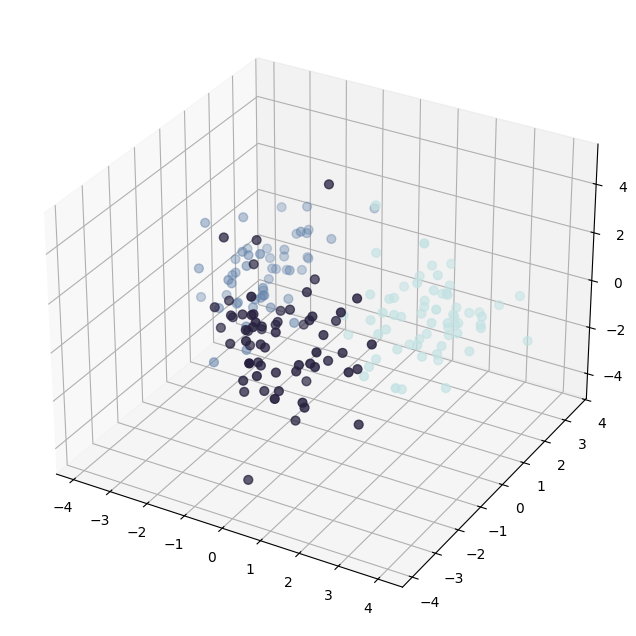

In [200]:
x = pca_df['c1']
y = pca_df['c2']
z = pca_df['c3']

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, s = 40, c = pca_df['KMeans_Clusters'], marker = 'o', cmap = cmap)
plt.show()

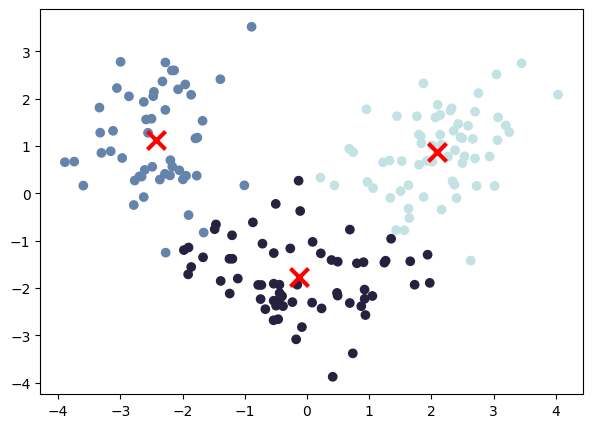

In [201]:
centroids = np.zeros((km.n_clusters, pca_df.shape[1]))

for i in range(km.n_clusters):
    centroids[i, :] = np.mean(pca_df[pca_df["KMeans_Clusters"] == i], axis = 0)

fig = plt.figure(figsize = (7, 5))

plt.scatter(x, y, c=pca_df['KMeans_Clusters'], cmap=cmap)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)

plt.show()

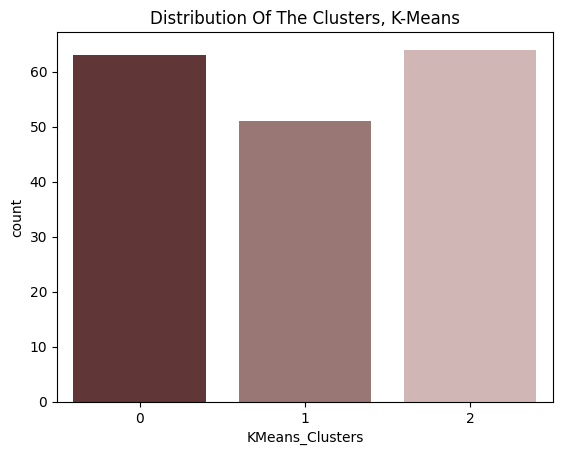

In [202]:

pl = sns.countplot(x=data['KMeans_Clusters'], palette = pal)
pl.set_title("Distribution Of The Clusters, K-Means")
plt.show()

## analiza

In [203]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline', 'KMeans_Clusters'],
      dtype='object')

In [204]:
columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols',  'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

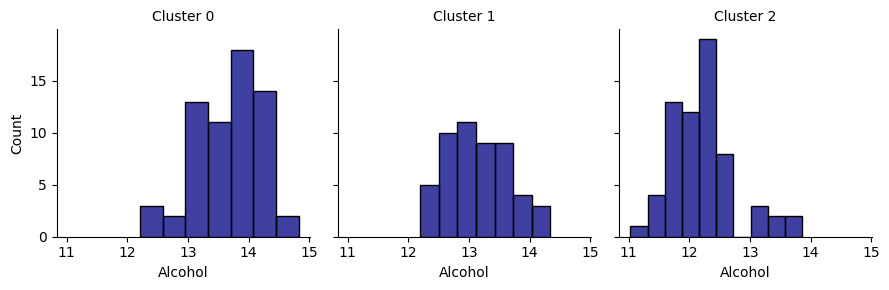

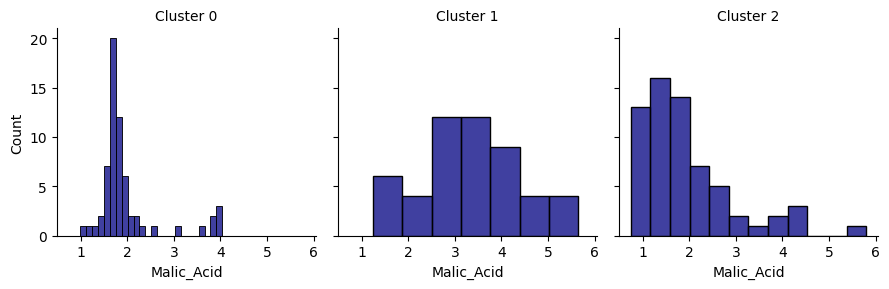

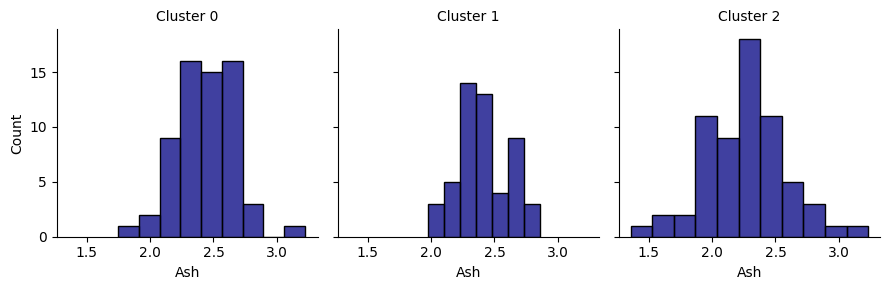

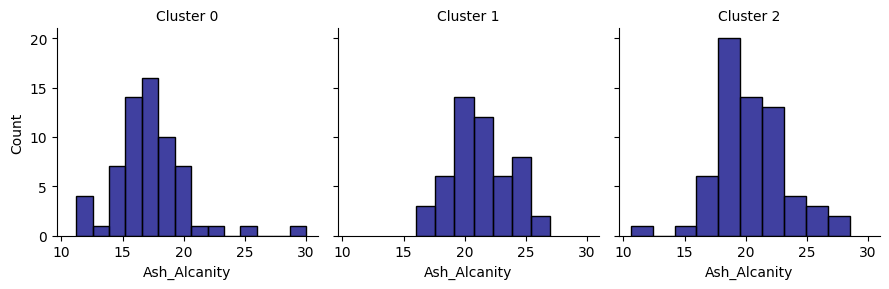

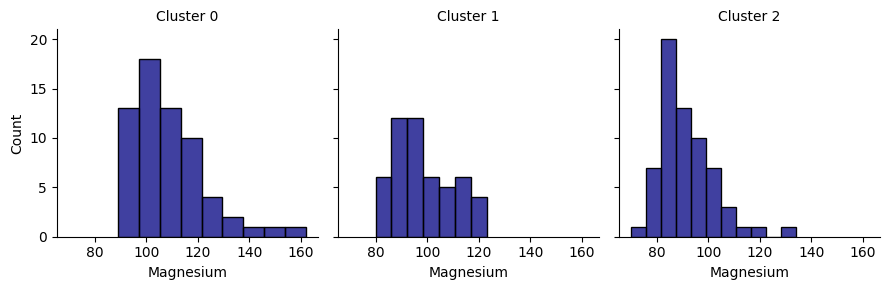

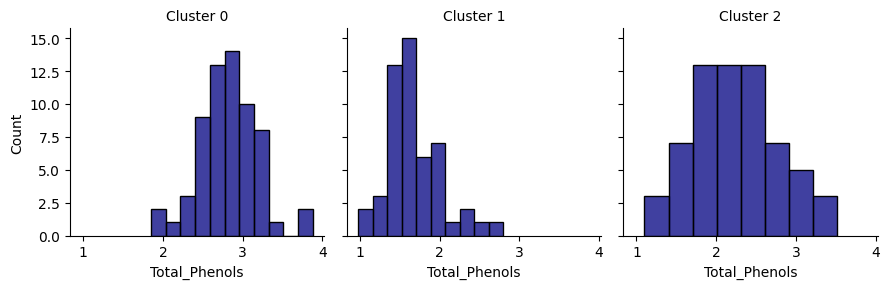

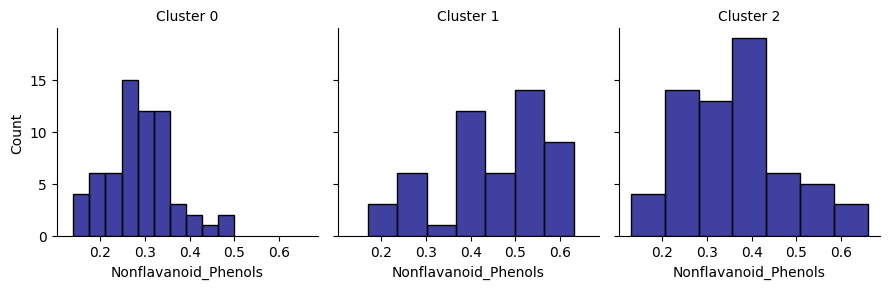

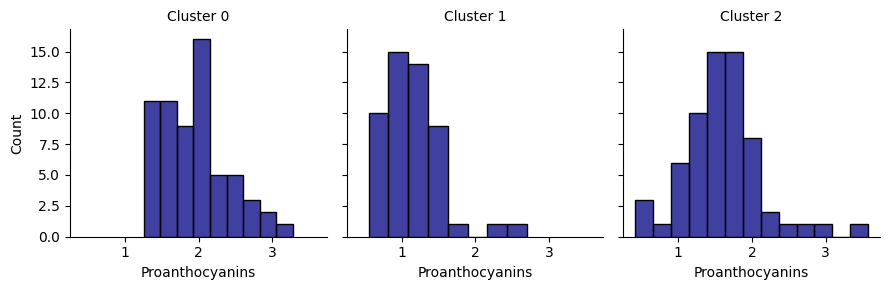

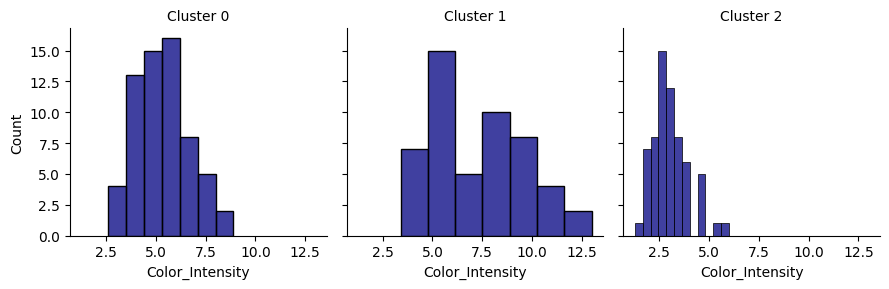

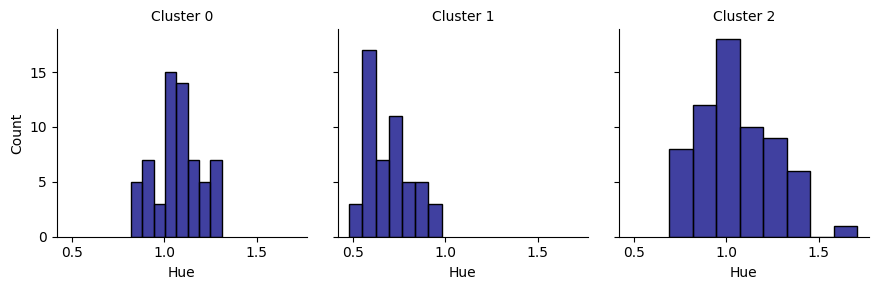

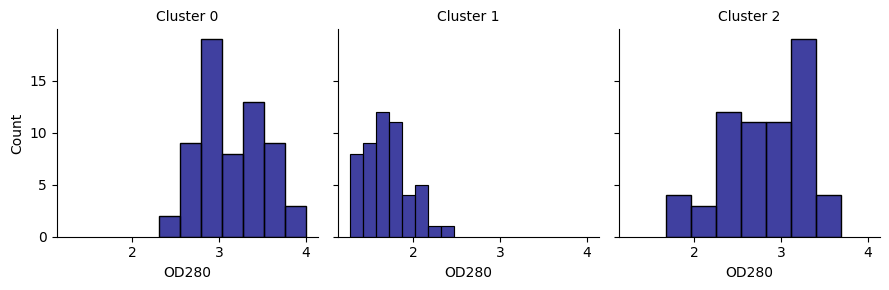

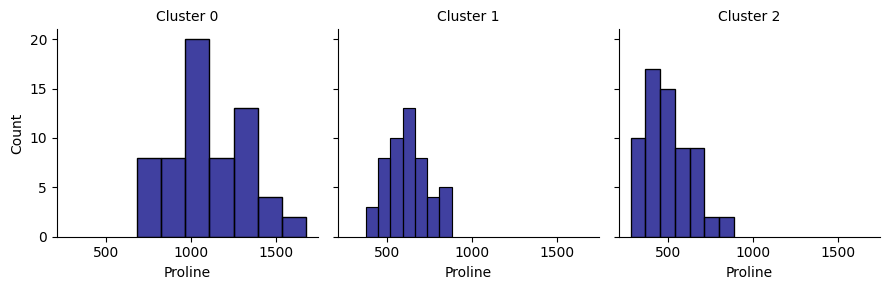

In [205]:

for f in columns:
    g = sns.FacetGrid(data, col="KMeans_Clusters", col_wrap=3, sharex=True, sharey=True)
    g.map(sns.histplot, f, kde=False, color='navy')  
    g.set_titles("Cluster {col_name}")
    g.set_axis_labels(f, "Count")  
    plt.tight_layout() 

plt.show()

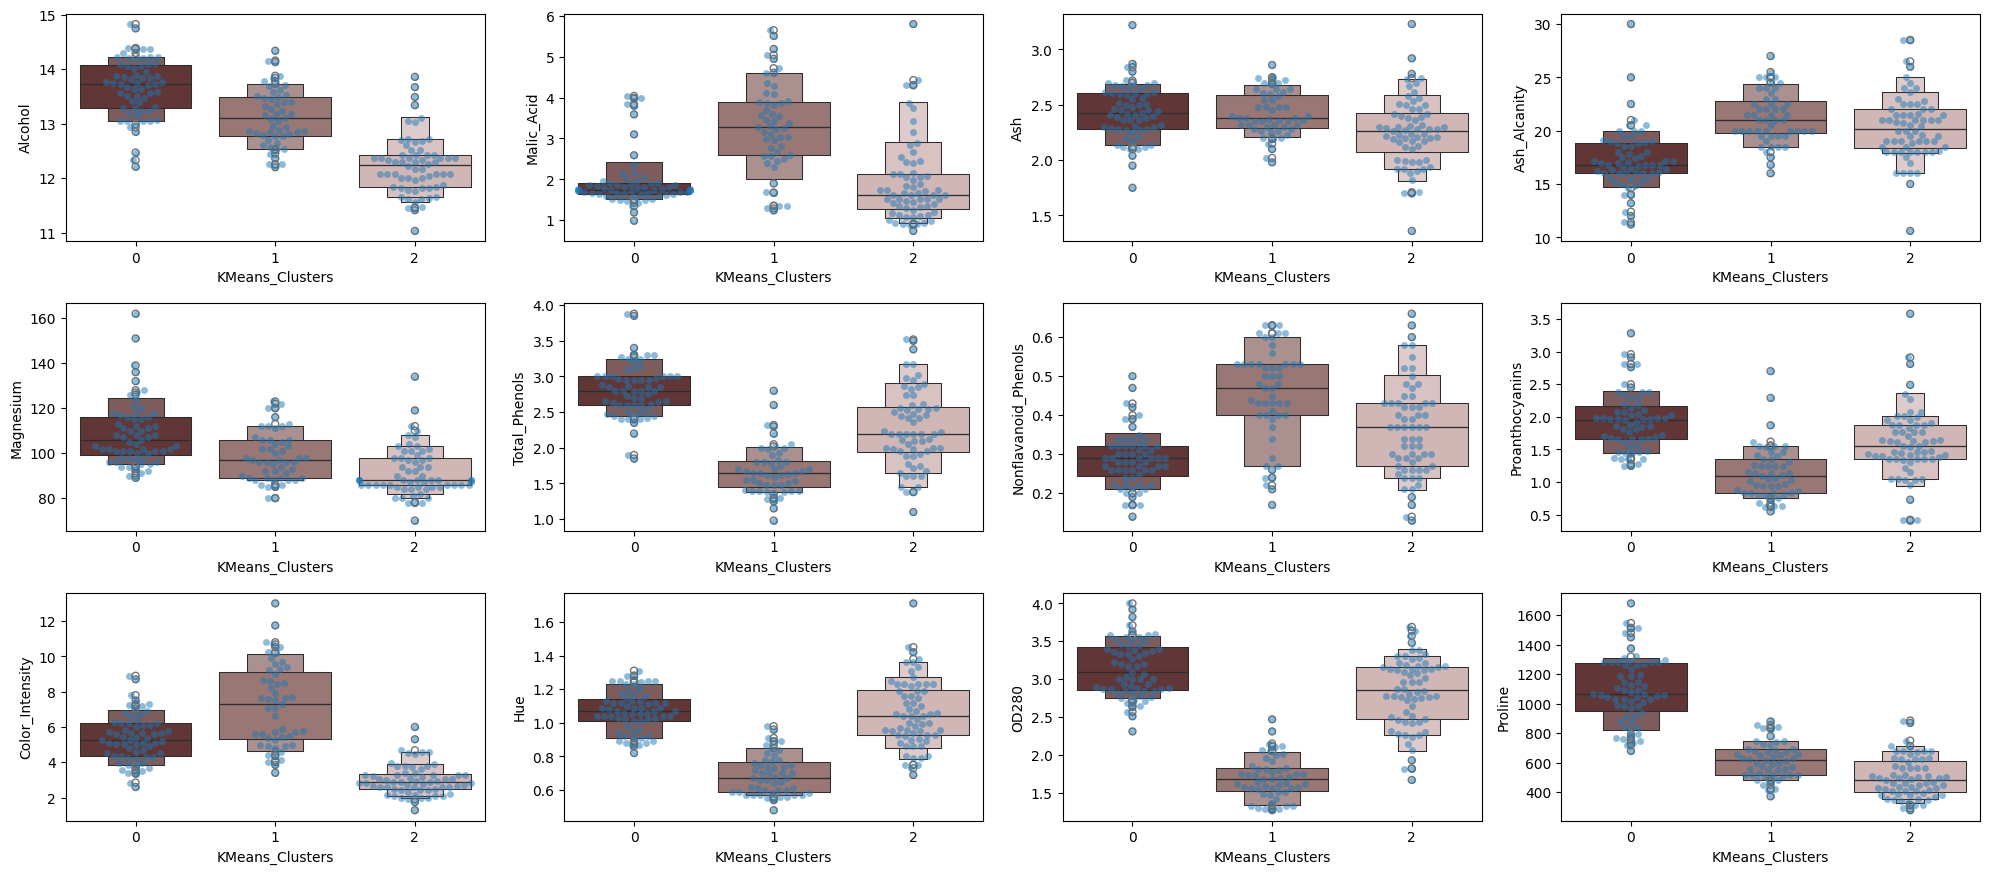

In [206]:

plt.figure(figsize=(20, 20))

for i, col in enumerate(columns, 1):

    plt.subplot(num_rows, num_columns, i)
    sns.swarmplot(x = data['KMeans_Clusters'], y = data[col], alpha = 0.5)
    sns.boxenplot(x = data['KMeans_Clusters'], y = data[col], palette=pal)
    plt.tight_layout() 
plt.show()



**Klaster 0:**  
- Visok sadržaj alkohola  
- Nizak nivo malinske kiseline  
- Nizak nivo pepela  
- Nizak nivo alkalnosti pepela  
- Visok sadržaj magnezijuma  
- Visok nivo ukupnih fenola  
- Nizak nivo nefavonoidnih fenola  
- Visok nivo proantocijanina  
- Umeren intenzitet boje  
- Tamnije nijanse  
- Visoka vrednost OD280  
- Visok nivo prolina  

Vina iz klastera 0 imaju visok sadržaj alkohola i fenola, visok nivo prolina i tamnije nijanse, ali umeren intenzitet boje.


**Klaster 1:**  
- Umeren nivo alkohola  
- Visok sadržaj malinske kiseline  
- Umeren nivo pepela  
- Umeren nivo alkalnosti pepela  
- Umeren sadržaj magnezijuma  
- Umeren nivo ukupnih fenola  
- Visok nivo nefavonoidnih fenola  
- Umeren nivo proantocijanina  
- Visok intenzitet boje  
- Svetlije nijanse  
- Niska vrednost OD280  
- Nizak nivo prolina  

Vina iz klastera 1 su svetlijih nijansi, visokog intenziteta boje, ali sa nižim nivoom prolina i umerenim alkoholom.


**Klaster 2:**  
- Nizak sadržaj alkohola  
- Umeren nivo malinske kiseline  
- Visok nivo pepela  
- Visok nivo alkalnosti pepela  
- Nizak sadržaj magnezijuma  
- Nizak nivo ukupnih fenola  
- Umeren nivo nefavonoidnih fenola  
- Nizak nivo proantocijanina  
- Nizak intenzitet boje  
- Širok spektar nijansi  
- Umerena vrednost OD280  
- Umeren nivo prolina  

Vina iz klastera 2 imaju niži sadržaj alkohola i fenola, nizak intenzitet boje, ali pokazuju širok spektar nijansi i umerene nivoe prolina.   

# Agglomerative

In [207]:
AC = AgglomerativeClustering(n_clusters = 3)
yhat_AC = AC.fit_predict(pca_df)


In [208]:

pca_df['AC_Clusters'] = yhat_AC
data['AC_Clusters'] = yhat_AC

centroids = np.zeros((AC.n_clusters, pca_df.shape[1]))

for i in range(AC.n_clusters):
    centroids[i, :] = np.mean(pca_df[pca_df["AC_Clusters"] == i], axis = 0)


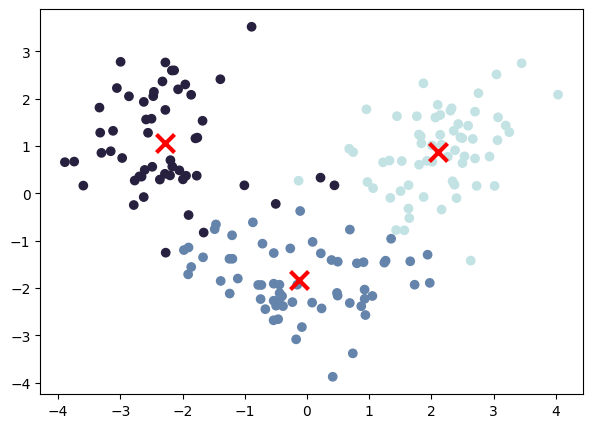

In [209]:

fig = plt.figure(figsize = (7, 5))

plt.scatter(x, y, c=pca_df['AC_Clusters'], cmap=cmap)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='r', zorder=10)

plt.show()

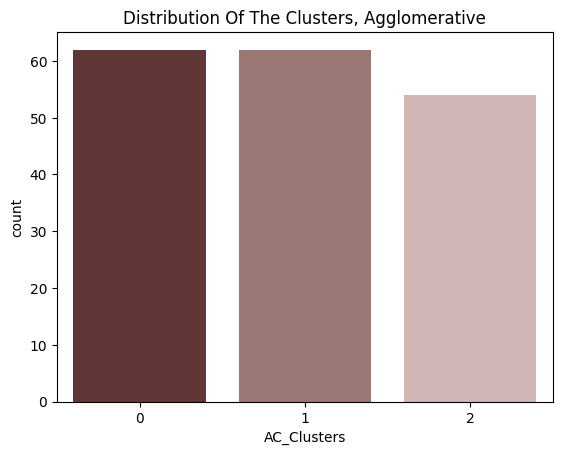

In [210]:

pl = sns.countplot(x=data['AC_Clusters'], palette= pal)
pl.set_title("Distribution Of The Clusters, Agglomerative")
plt.show()

In [211]:
accuracy_score(data['KMeans_Clusters'], data['AC_Clusters'])

0.34831460674157305

## dendogram

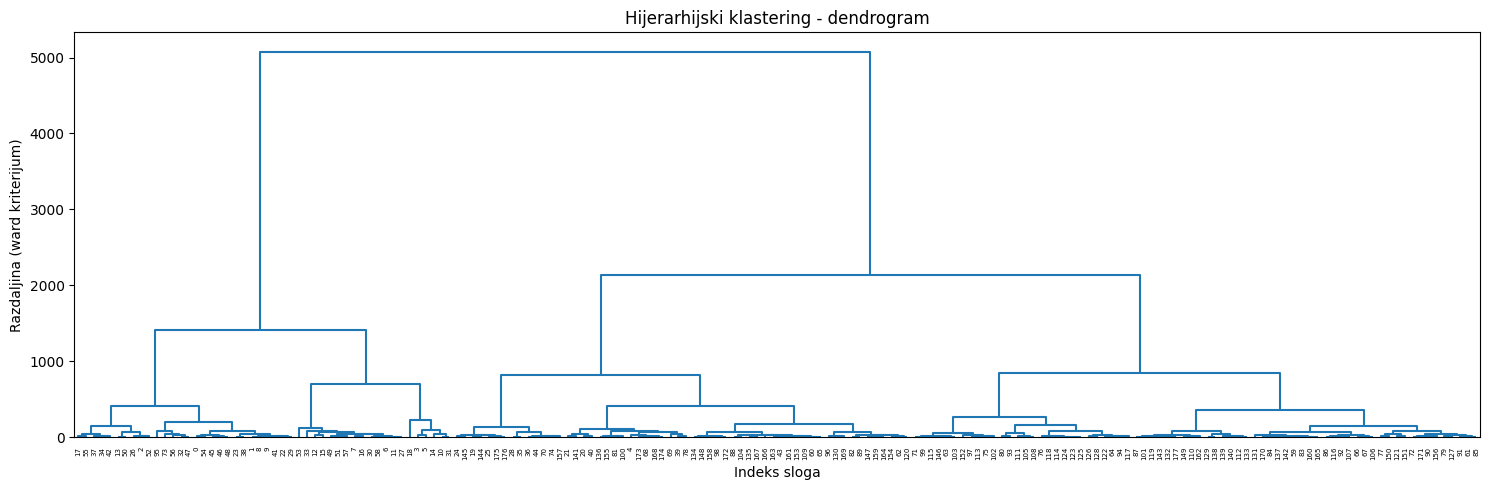

In [212]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(data, 'ward')
figure = plt.figure(figsize=(15, 5))
dendrogram(linkage_matrix, color_threshold=0)
plt.title('Hijerarhijski klastering - dendrogram')
plt.xlabel('Indeks sloga')
plt.ylabel('Razdaljina (ward kriterijum)')
plt.tight_layout()
plt.show()


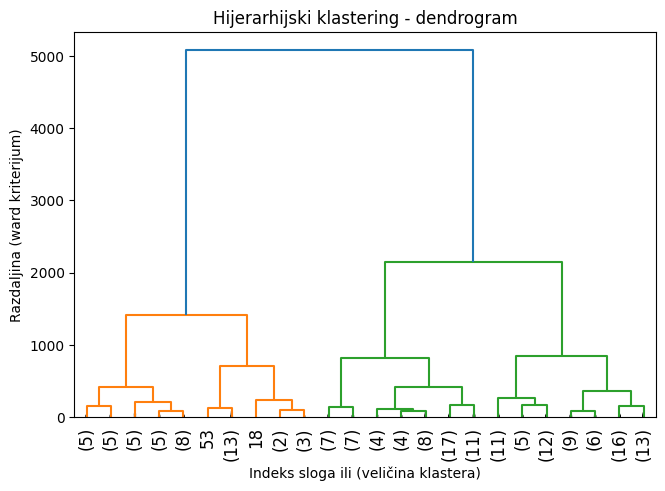

In [213]:

figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',   
    p=24, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  
)
plt.title('Hijerarhijski klastering - dendrogram')
plt.xlabel('Indeks sloga ili (veličina klastera)')
plt.ylabel('Razdaljina (ward kriterijum)')
plt.show()

## analiza

In [214]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline', 'KMeans_Clusters',
       'AC_Clusters'],
      dtype='object')

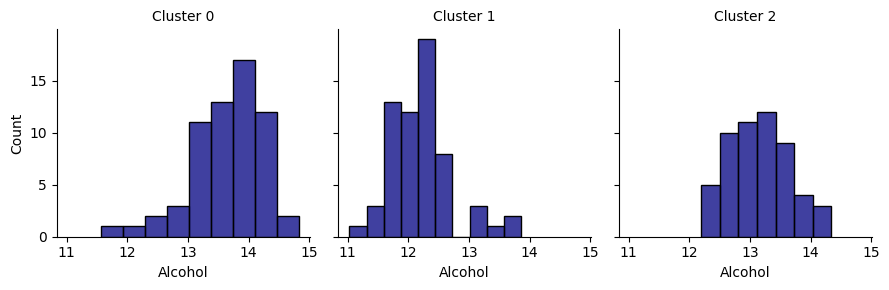

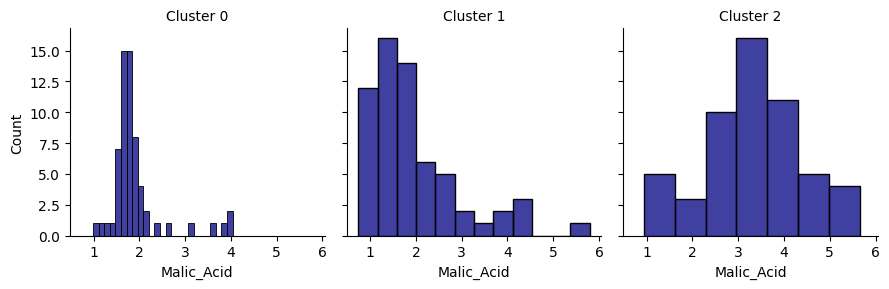

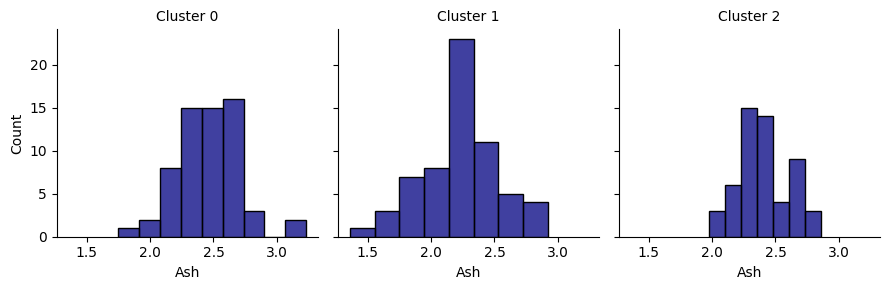

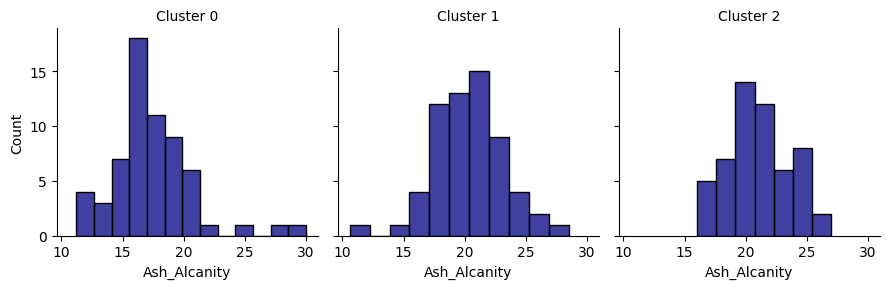

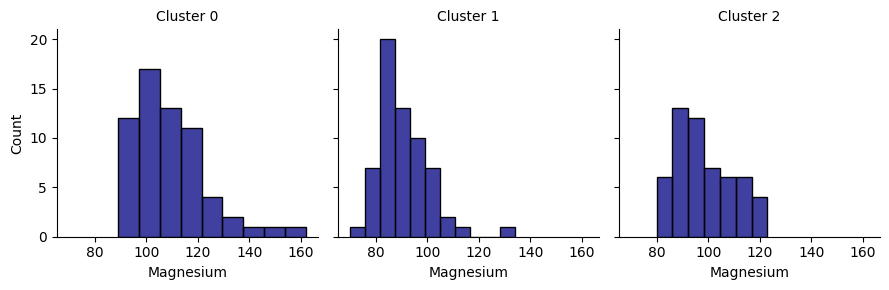

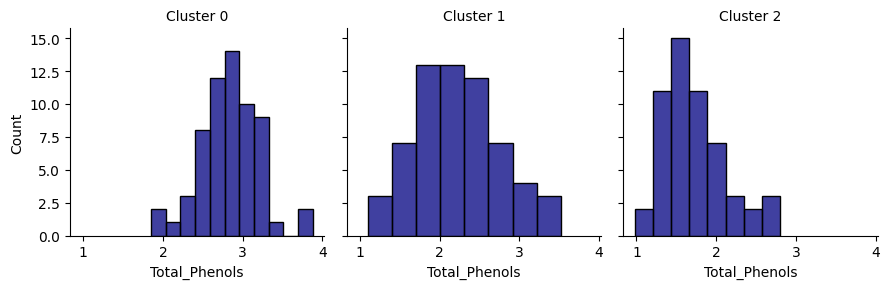

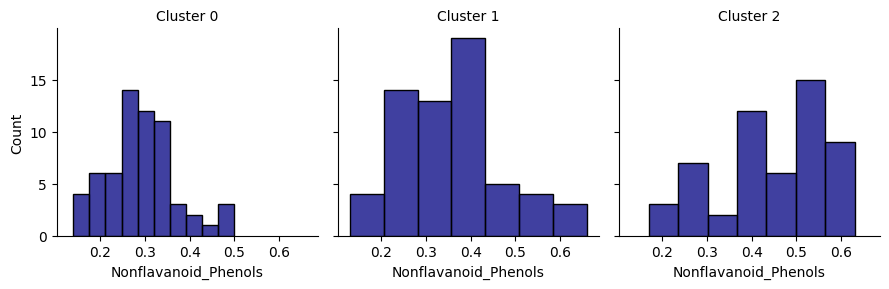

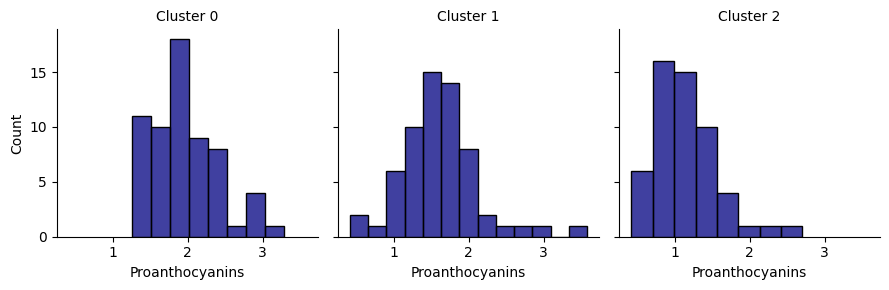

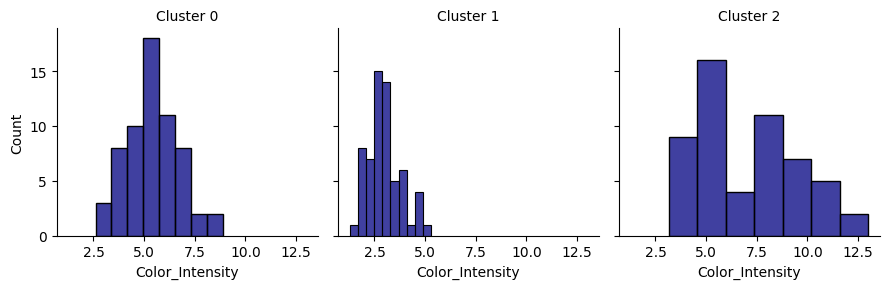

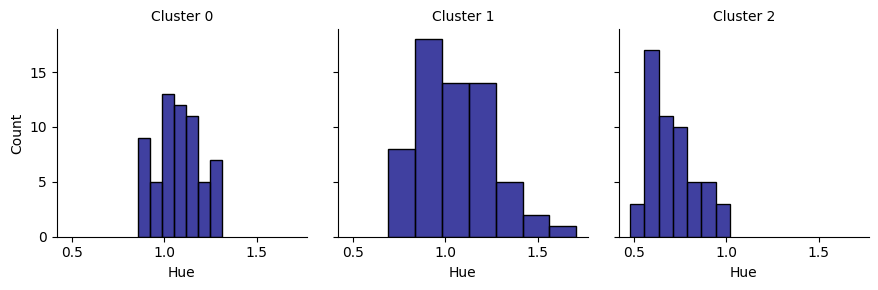

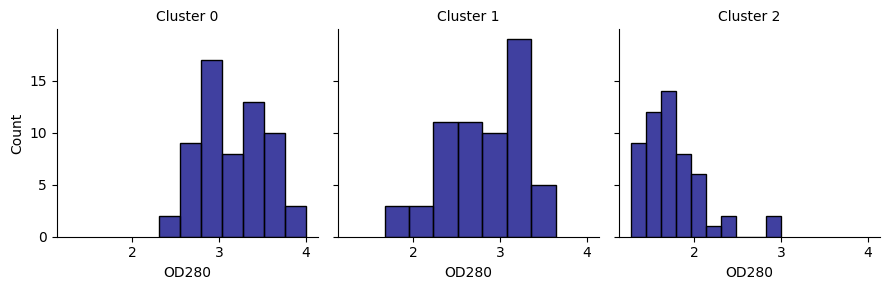

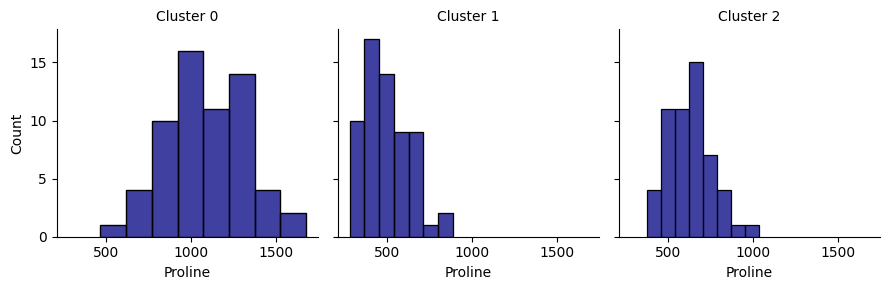

In [215]:
for f in columns:
    g = sns.FacetGrid(data, col="AC_Clusters", col_wrap=3, sharex=True, sharey=True)
    g.map(sns.histplot, f, kde=False, color='navy') 
    g.set_titles("Cluster {col_name}")
    g.set_axis_labels(f, "Count")  
    plt.tight_layout() 

plt.show()

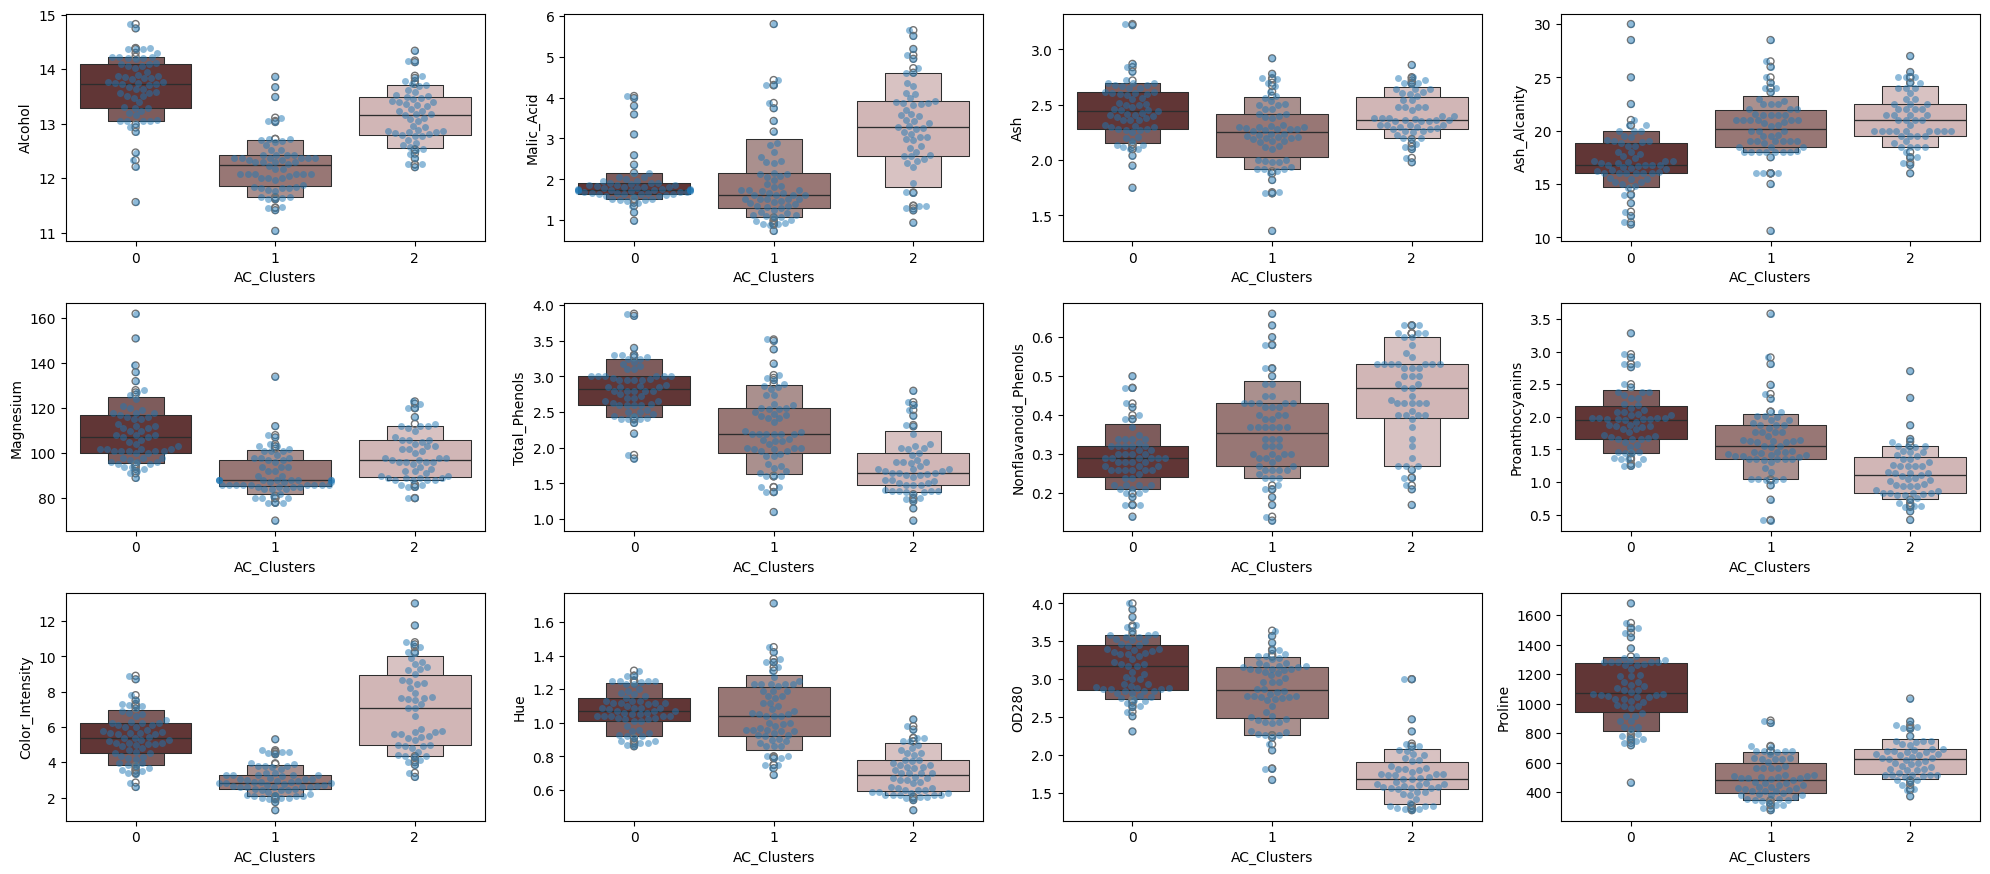

In [216]:

plt.figure(figsize=(20, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.swarmplot(x = data['AC_Clusters'], y = data[col], alpha = 0.5)
    sns.boxenplot(x = data['AC_Clusters'], y = data[col], palette=pal)
    plt.tight_layout() 
plt.show()


**Klaster 0:**  
- Visok sadržaj alkohola  
- Nizak nivo malinske kiseline  
- Umeren nivo pepela  
- Umeren nivo alkalnosti pepela  
- Visok sadržaj magnezijuma  
- Visok nivo ukupnih fenola  
- Nizak nivo nefavonoidnih fenola  
- Visok nivo proantocijanina  
- Nizak intenzitet boje  
- Tamnije nijanse  
- Visoka vrednost OD280  
- Visok nivo prolina  

Vina iz klastera 0 imaju visok sadržaj alkohola, magnezijuma, fenola i prolina, tamnije nijanse i nizak intenzitet boje.


**Klaster 1:**  
- Umeren nivo alkohola  
- Srednji nivo malinske kiseline  
- Umeren nivo pepela  
- Visok nivo alkalnosti pepela  
- Umeren sadržaj magnezijuma  
- Umeren nivo ukupnih fenola  
- Srednji nivo nefavonoidnih fenola  
- Srednji nivo proantocijanina  
- Visok intenzitet boje  
- Svetlije nijanse  
- Srednja vrednost OD280  
- Umeren nivo prolina  

Vina iz klastera 1 imaju umeren sadržaj alkohola, fenola i prolina, svetlije nijanse i visok intenzitet boje.

**Klaster 2:**  
- Nizak sadržaj alkohola  
- Visok nivo malinske kiseline  
- Visok nivo pepela  
- Nizak nivo alkalnosti pepela  
- Nizak sadržaj magnezijuma  
- Nizak nivo ukupnih fenola  
- Visok nivo nefavonoidnih fenola  
- Nizak nivo proantocijanina  
- Umeren intenzitet boje  
- Širok spektar nijansi  
- Niska vrednost OD280  
- Nizak nivo prolina  

Vina iz klastera 2 imaju nizak sadržaj alkohola, magnezijuma i fenola, širok spektar nijansi i umeren intenzitet boje.

